In [The Mean as Predictor](mean_meaning), we found that the mean had some good properties as a single best predictor for a whole distribution.

* The mean gives a total prediction error of zero.  Put otherwise, on
  average, your prediction error is zero.
* The mean gives the lowest squared error.  Put otherwise, the mean
  gives the lowest average squared difference from the observed value.

Now we can consider what predictor we should use when predicting one set of values, from a different set of values.

We load our usual libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 2 decimal places, show tiny values as 0
np.set_printoptions(precision=2, suppress=True)
import pandas as pd

Again, we use the gender data that we first saw in the [data frame introduction](../04/data_frame_intro).

In [2]:
# Load the data file
gender_data = pd.read_csv('gender_stats.csv')

We have already seen the data for the Maternal Mortality Ratio
`mat_mort_ratio`.   Now we will look to see whether we can predict the Maternal Mortality Ratio (MMR) with the Fertility Rate.  The Fertility Rate (FR) is the total number of births per woman.  We predict that countries with many births per woman will also tend to have high Maternal Mortality Ratios. Fertility Rate is `fert_rate` in the `gender_data` data frame.

In [3]:
# Show the column names
gender_data.columns

Index(['country', 'fert_rate', 'gdp', 'health_exp_per_cap', 'health_exp_pub',
       'prim_ed_girls', 'mat_mort_ratio', 'population'],
      dtype='object')

To start, we make a new data frame that contains only the columns corresponding to MMR and FR.  To get two columns out of a data frame, we pass a list of column names inside square brackets:

In [4]:
# Make new data frame with only MMR and FR
just_mmr_fr = gender_data[['mat_mort_ratio', 'fert_rate']]

To save space, we only show the first five rows of the data frame, using the `head` method of the data frame.

In [5]:
# Show the first five rows
just_mmr_fr.head()

,mat_mort_ratio,fert_rate
0,444.00,4.95450
1,29.25,1.76925
2,142.50,2.86600
3,NaN,NaN
4,NaN,NaN


Looking at these values, we see that there are missing values: `NaN`.  These will make our life harder.  For now, we drop all rows that have any missing values, using the `dropna` method of the data frame.

In [6]:
# Drop all rows with any NaN values
clean_mmr_fr = just_mmr_fr.dropna()
clean_mmr_fr.head()

,mat_mort_ratio,fert_rate
0,444.00,4.954500
1,29.25,1.769250
2,142.50,2.866000
5,501.25,6.123000
7,161.00,3.397587


We fetch out the columns of MMR and FR data.  These are each Pandas Series:

In [7]:
mmr_series = clean_mmr_fr['mat_mort_ratio']
fert_series = clean_mmr_fr['fert_rate']
type(fert_series)

pandas.core.series.Series

The last step in our data munging is to convert the columns of MMR and FR data into arrays, to make them simpler to work with.  We do this with the Numpy `array` function, that makes arrays from many other types of object.

In [8]:
mmr = np.array(mmr_series)
fert = np.array(fert_series)

## Looking for straight lines

Now we are ready to look for a relationship between MMR and FR.

As usual, we start with a plot.  This time, for fun, we add a label to the X and Y axes with `xlabel` and `ylabel`.

Text(0, 0.5, 'Maternal mortality ratio')

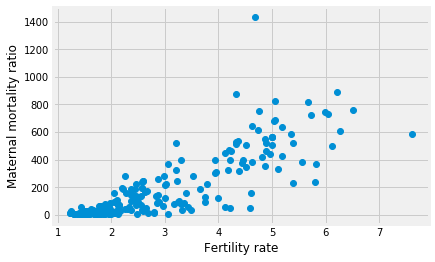

In [9]:
# Plot FR on the x axis, MMR on the y axis
plt.plot(fert, mmr, 'o')
plt.xlabel('Fertility rate')
plt.ylabel('Maternal mortality ratio')

The `'o'` argument to the plot function above is a "plot marker".  It tells Matplotlib to plot the points as points, rather than joining them with lines.  The markers for the points will be filled circles, with `'o'`, but we can also ask for other symbols such as plus marks (with `'+'`) and crosses (with `'x'`).

## Putting points on plots

Before we go on, we will need some machinery to plot arbitrary points on plots.

In fact this works in exactly the same way as the points you have already seen on plots.  We use the `plot` function, with a suitable plot marker.  The x coordinates of the points go in the first argument, and the y coordinates go in the second.

To plot a single point, pass a single x and y coordinate value:

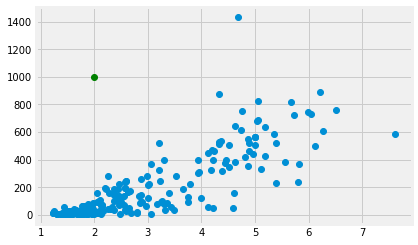

In [10]:
plt.plot(fert, mmr, 'o')
# A green point at x=2, y=1000
plt.plot(2, 1000, 'o', color='green')

To plot more than one point, pass multiple x and y coordinate values:

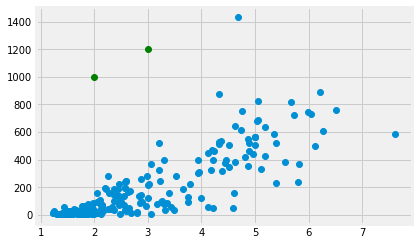

In [11]:
plt.plot(fert, mmr, 'o')
# Two green points, one at [2, 1000], the other at [3, 1200]
plt.plot([2, 3], [1000, 1200], 'o', color='green')

## The mean as applied to plots

We want a straight line that fits these points.

The straight line should do the best job it can in *predicting* the MMR values from the FP values.

We found that the mean was a good predictor.  We could try and find a line or something similar that went through the mean of the MMR values, at any given FR value.

Let's split the FR values up into bins centered on 1.5, 2.5 and so on.  Then we take the mean of all the MMR values corresponding to FR values between 1 and 2, 2 and 3 and so on.

In [12]:
# The centers for our FR bins
fert_bin_centers = np.arange(7) + 1.5
fert_bin_centers

array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

In [13]:
# The number of bins
n_bins = len(fert_bin_centers)
n_bins

7

Show the center of the bins on the x axis of the plot.

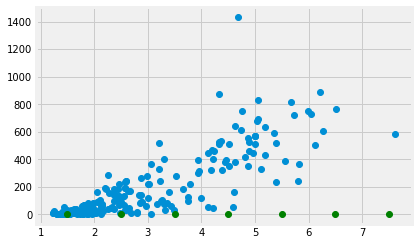

In [14]:
plt.plot(fert, mmr, 'o')
plt.plot(fert_bin_centers, np.zeros(n_bins), 'o', color='green')

Take the mean of the MMR values for each bin.

In [15]:
mmr_means = np.zeros(n_bins)
for i in np.arange(n_bins):
    mid = fert_bin_centers[i]
    # Boolean identifing indices withing the FR bin
    fr_within_bin = (fert >= mid - 0.5) & (fert < mid + 0.5)
    # Take the mean of the corresponding MMR values
    mmr_means[i] = np.mean(mmr[fr_within_bin])
mmr_means

array([ 21.84, 106.97, 194.23, 461.48, 548.55, 698.35, 585.5 ])

These means should be good predictors for MMR values, given an FR value.  We check the bin of the FR value and take the corresponding MMR mean as the prediction.

Here is a plot of the means of MMR for every bin:

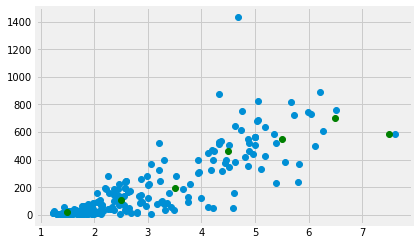

In [16]:
plt.plot(fert, mmr, 'o')
plt.plot(fert_bin_centers, mmr_means, 'o', color='green')

## Finding a predicting line

The means per bin give some prediction of the MMR values from the FR.  Can we do better?  Can we find a line that predicts the MMR data from the FR data?

Remember, any line can be fully described by an *intercept* and a *slope*.  A line predicts the $y$ values from the $x$ values, using the slope $s$ and the intercept $I$:

$$
y = I + x * s
$$

The *intercept* is the value of the line when x is equal to 0.  It is therefore where the line crosses the y axis.

In our case, let us assume the intercept is 0.  We will assume MMR of 0 if there are no births.  We will see that things are more complicated than that, but we will start there.

Now we want to find a good *slope*.  The *slope* is the amount that the y values increase for a one unit increase in the x values.  In our case, it is the increase in the MMR for a 1 child increase in the FR.

Let's guess the slope is 100.

In [17]:
slope = 100

Remember our line prediction for y (MMR) is:

$$
y = I + x * s
$$

where x is the FR.  In our case we assume the intercept is 0, so:

In [18]:
mmr_predicted = fert * slope

Plot the predictions in red on the original data in blue.

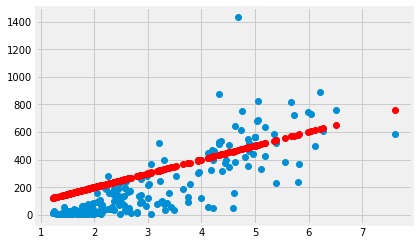

In [19]:
plt.plot(fert, mmr, 'o')
plt.plot(fert, mmr_predicted, 'o', color='red')

The red are the predictions, the blue are the original data.  At each MMR value we have a prediction, and therefore, an error in our prediction; the difference between the predicted value and the actual values.

In [20]:
error = mmr - mmr_predicted
error[:10]

array([ -51.45, -147.68, -144.1 , -111.05, -178.76, -179.05, -127.3 ,
       -180.15, -141.5 , -172.75])

In this plot, for each point, we draw a thin dotted line between the prediction of MMR for each point, and its actual value.

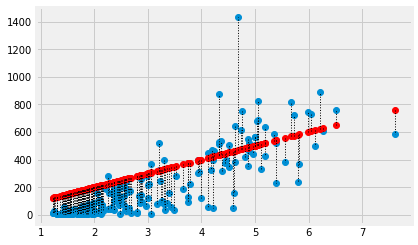

In [21]:
plt.plot(fert, mmr, 'o')
plt.plot(fert, mmr_predicted, 'o', color='red')
# Draw a line between predicted and actual
for i in np.arange(len(fert)):
    x = fert[i]
    y_0 = mmr_predicted[i]
    y_1 = mmr[i]
    plt.plot([x, x], [y_0, y_1], ':', color='black', linewidth=1)

## What is a good line?

We have guessed a slope, and so defined a line. We calculated the errors from our guessed line.

How would we decide whether our slope was a good one.  Put otherwise, how would we decide when we have a good line?

A good line should have small prediction errors. That is, the line should give a good prediction of the points.  That is, the line should result in small *errors*.

We would like a slope that gives us the smallest error.

## One metric for the line

[The Mean as Predictor](mean_meaning) section showed that the mean is the value with the smallest squared distance from the other values in the distribution.  Put another way, the mean is the predictor value that minimizes the sum of squared distances from the other values.

We can use the same metric for our line.  Instead of using a single vector as a predictor, now we are using the values on the line as predictors.  We want the FR slope, in our case, that gives the best predictors of the MMR values.  Specifically, we want the slope that gives the smallest sum of squares difference between the line prediction and the actual values.

We have already calculated the prediction and error for our slope of 100, but let's do it again, and then calculate the *sum of squares* of the error:

In [22]:
slope = 100
mmr_predicted = fert * slope
error = mmr - mmr_predicted
# The sum of squared error
sum(error ** 2)

7038632.756108372

We are about to do this calculation many times, for many different slopes.  We need a *function*.

In the function below, we are using [function world](../07/functions)
to get the values of `fert` and `mmr` defined here at the top level,
outside *function world*. The function can see these values, from
function world.

In [23]:
def sos_error(slope):
    fitted = fert * slope  # 'fert' comes from the top level
    error = mmr - fitted     # 'mmr' comes from the top level
    return np.sum(error ** 2)

First check we get the same answer as the calculation above:

In [24]:
sos_error(100)

7038632.75610837

Does 200 give a higher or lower sum of squared error?

In [25]:
sos_error(200)

40456091.81253432

Now we can use the same strategy as we used in the [mean meaning](mean_meaning) page, to try lots of slopes, and find the one that give the smallest sum of squared error.

In [26]:
# Slopes to try
some_slopes = np.arange(50, 110, 0.1)
n_slopes = len(some_slopes)
# Try all these slopes, calculate and record sum of squared error
sos_errors = np.zeros(n_slopes)
for i in np.arange(n_slopes):
    slope = some_slopes[i]
    sos_errors[i] = sos_error(slope)
# Show the first 10 values
sos_errors[:10]

array([7695798.57, 7682930.13, 7670107.99, 7657332.17, 7644602.66,
       7631919.45, 7619282.56, 7606691.97, 7594147.7 , 7581649.73])

We plot the slopes we have tried, on the x axis, against the sum of squared error, on the y-axis.


Text(0, 0.5, 'Sum of squared error')

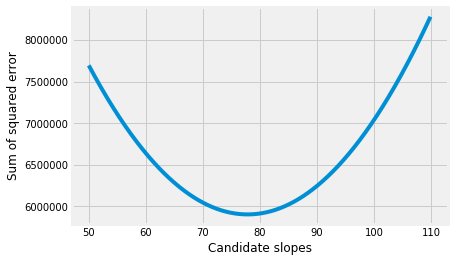

In [27]:
plt.plot(some_slopes, sos_errors)
plt.xlabel('Candidate slopes')
plt.ylabel('Sum of squared error')

The minimum of the sum of squared error is:

In [28]:
np.min(sos_errors)

5901409.5805078605

We want to find the slope that corresponds to this minimum.  We can use [argmin](where_and_argmin).

In [29]:
# Index of minumum value
i_of_min = np.argmin(sos_errors)
i_of_min

278

This is the index position of the minimum.  We will therefore get the minimum (again) if we index into the original array with the index we just found:

In [30]:
# Check we do in fact get the minimum at this index
sos_errors[i_of_min]

5901409.5805078605

Now we can get and show the slope value that corresponds the minimum sum of squared error:

In [31]:
best_slope = some_slopes[i_of_min]
best_slope

77.8000000000004

Plot the data, predictions and errors for the line that minimizes the sum of squared error:

Text(0.5, 1.0, 'The best-fit line using least-squared error')

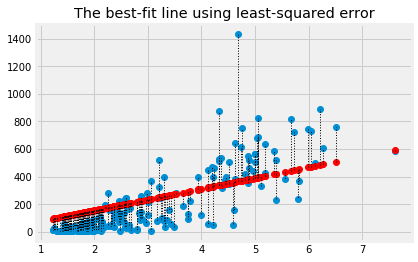

In [32]:
best_predicted = fert * best_slope
plt.plot(fert, mmr, 'o')
plt.plot(fert, best_predicted, 'o', color='red')
for i in np.arange(len(fert)):
    x = fert[i]
    y_0 = best_predicted[i]
    y_1 = mmr[i]
    plt.plot([x, x], [y_0, y_1], ':', color='black', linewidth=1)
plt.title('The best-fit line using least-squared error')

The algorithm we have used so far, is rather slow and clunky, because we had to make an array with lots of slopes to try, and then go through each one to find the slope that minimizes the squared error.

In fact, we will soon see, we can use some tricks to get Python to do all this work for us, much more quickly.

Finding techniques for doing this automatically is a whole
mathematical field, called
[optimization](https://en.wikipedia.org/wiki/Mathematical_optimization).

For now, let's leap to using these techniques on our problem, of finding the best slope:

In [33]:
from scipy.optimize import minimize
# 100 below is the slope value to start the search.
minimize(sos_error, 100)

      fun: 5901406.206272444
 hess_inv: array([[0.]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([77.84])